### <p style="text-align: right;"> &#9989; Xinyi Lou.</p>

# Homework Assignment #1 (Individual)
## Git Practice, Debugging Practice, Modeling World Population, and Writing Python Scripts


### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Use Git to create a repository, track changes to the files within the repository, and push those changes to a remote repository.
* Debug Python code.
* Work with Python data structures (e.g. lists and numpy arrays) to create a simple population growth model.
* Make plots of your model using <code>matplotlib</code>.
* Practice writing and executing a Python script.

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **25 points** possible on this assignment. Point values for each part are included in the section headers.

**This assignment is due roughly one and half weeks from now at 11:59pm on Friday, September 13.** It should be uploaded into the "Homework Assignments" submission folder for Homework #1.  Submission instructions can be found at the end of the notebook.

---
## Part 1: Setting up a git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-f19-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

1. Navigate to your `cmse202-f19-turnin` repository and create a new directory called `hw-01`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment. For Section 001, you should add users "chenmi22" and "linkmat1". For Section 002, you should add users "punch" and "polanco2".

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**.

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f19-turnin`" repository inside the `hw-01` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

---

---

## Part 2: Debugging code: understanding error messages (6 points)

For the next part of this assignment, you're going to presented with a variety of code bugs and your job is to fix them.

### Fixing errors

**Question**: Resolve the errors in the following pieces of code and add a comment that explains what was wrong in the first place.

In [2]:
# Syntax bug: There should be a colon in "for loop".
for i in range(10):
    print("The value of i is %i" %i)

The value of i is 0
The value of i is 1
The value of i is 2
The value of i is 3
The value of i is 4
The value of i is 5
The value of i is 6
The value of i is 7
The value of i is 8
The value of i is 9


In [5]:
# The denominator could not be zero.
def compute_fraction(numerator, denominator):
    fraction = numerator/denominator
    print("The value of the fraction is %f" %fraction)
    
compute_fraction(5, 1)

The value of the fraction is 5.000000


In [6]:
# "one" is a string and could not be calculated.
def compute_fraction(numerator, denominator):
    fraction = numerator/denominator
    print("The value of the fraction is %f" %fraction)
    
compute_fraction(1, 25)

The value of the fraction is 0.040000


In [8]:
# When locate the element in array, we should use "[]"
import numpy as np

n = np.arange(20)
print("The value of the 10th element is %d" %n[9])

The value of the 10th element is 9


In [10]:
# type error?
odd = [1, 3, 5, 7, 9]
even = [2, 4, 6, 8, 10]

for i in odd:
    print(i)
    
for j in even:
    print(j)

1
3
5
7
9
2
4
6
8
10


In [12]:
# It didn't define translation of "orange"
spanish = dict()
spanish['hello'] = 'hola'
spanish['yes'] = 'si'
spanish['one'] = 'uno'
spanish['two'] = 'dos'
spanish['three'] = 'tres'
spanish['red'] = 'rojo'
spanish['black'] = 'negro'
spanish['green'] = 'verde'
spanish['blue'] = 'azul'
spanish['orange'] = 'naranja'

print(spanish["hello"])
print(spanish["one"], spanish["two"], spanish["three"])
print(spanish["orange"])

hola
uno dos tres
naranja


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 2", and push the changes to GitHub.

---

---
## Part 3: Modeling  population growth (14 points)

In this part of the assignment, you'll develop a model of world population growth. The United Nations has recently come out with some updated predictions on world population growth that shows the slowing of growth, reaching a maximum of 11 billion in 2100 with a potential decline worldwide beginning then. This is in contrast to dire predictions of uncontrolled growth from the 1960's on beginning with the book "The Population Bomb" (https://en.wikipedia.org/wiki/The_Population_Bomb). While overall growth depends primarily on two factors: birth rate and death rate, it is the change in the birth rate that is driving this change. In particular, as women worldwide achieve more wealth and education, they are having fewer children beginning later in life.

<img src="https://i.imgur.com/rvNszAw.png" alt="UN world growth graph" width="700px"/>

You'll start out with the simplest possible model and then you'll add bit of complexity to the model and see how it changes the results.

### 3.1 A Simple model (3 points)

For this part of the assignment, you're going to write a program that models world population growth based on a simple value, the annual rate of growth (*gr*). This growth rate summarizes the changes in birth and death rates and measures the annual change to a population every year thus:

$$ nextPop = prevPop + (prevPop * gr) $$

Note that *gr* can be negative and, if so, results in a population decline.

Your code should take in the name of a file to open that has exactly the following file format (we provide *worldpop.csv* as an example.)
* one line
* the first field contains the starting world population value (beginning in the year 2020) in millions. It is an integer
* the subsequent values are 16 gr values, starting with 2020, and subsequently every 5 years until 2100
    * the *gr* values are floating point values
* all values are comma separated, csv, files. 

**You goal is to plot the *world population* values beginning in 2020 until 2100 (inclusive). Also print the final world population in 2100.**

### Important Notes
First, the *gr* values given are **percentages**. Thus 0.98 (the first *gr* value in *worldpop.txt*) represents the actual value 0.0098.

Second, the *gr* values represent **yearly** growth. But you only get new *gr* values every 5 years. For now let us assume that the *gr* value remains unchanged (has the same value) for each 5 year interval

**Code up a solution to this simple model. Make sure to clearly state the assumptions you use in your model and create a plot showing your resulting model.**


**My model assumptions are...** (edit this cell and explain your assumptions here)

In [1]:
#
# Put your code here
#
# Import the data "worldpop.csv"
import numpy as np 
worldpop = np.loadtxt("worldpop.csv", unpack=True, skiprows = 0, delimiter=',')
worldpop


array([7.726735e+06, 1.090000e+00, 9.800000e-01, 8.700000e-01,
       7.800000e-01, 6.900000e-01, 6.100000e-01, 5.300000e-01,
       4.500000e-01, 3.800000e-01, 3.200000e-01, 2.700000e-01,
       2.200000e-01, 1.800000e-01, 1.400000e-01, 1.100000e-01,
       8.000000e-02, 4.000000e-02])

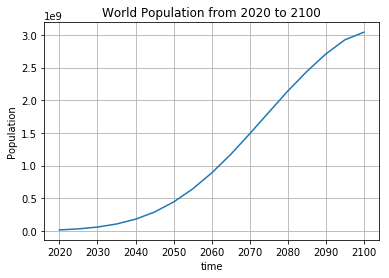

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Init_Pop = worldpop[0]
gr = worldpop[worldpop < 10]

Pop = []
Pop.append(Init_Pop + Init_Pop*gr[0])
for i in range(1,len(gr)):
    Pop.append( Pop[-1] * (1+gr[i]) )

time = np.arange(2020,2101,5)
plt.plot(time, Pop)
plt.title("World Population from 2020 to 2100")
plt.xlabel('time')
plt.ylabel('Population')
plt.grid(True)

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.1", and push the changes to GitHub.

---

### 3.2 Building a Model (3 points)

We have data points for the *gr* values but we have not created a model based on them. Let's do that now. We could try to do a curve fit to the points, but for now we are going to linearly interpolate between the `gr` points by year. You may or may not have done a linear interpolation before, so here is a review of how linear interpolation works:

Given two points $x_0, y_0$ and $x_1, y_1$ we can use the following equation to predict a y-value given a particular x-value in the range of $x_0 - x_1$

$$ y = \frac{y_0(x_1 - x) + y_1(x - x_0)}{x_1-x_0} $$

You could do this yourself, but if you believe in Python you have to guess someone has already done that for you. They have! Look at https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html for details, but the basics is this. 

`numpy.interp(newX, xrange, yrange)` yields the predicted y-value from the `newX` value. Let's redo the calculations above but now collect data for **each year** between 2020 and 2100 (inclusive) and generate a new *gr* value **for each year** from the 5-year values given and our linear interpolation.

If we use new variable names, we can keep the ones used above and do a nice comparison. You don't need to open the file again either (though by doing things in this way we develop a linear dependency on the cells above being evaluated).

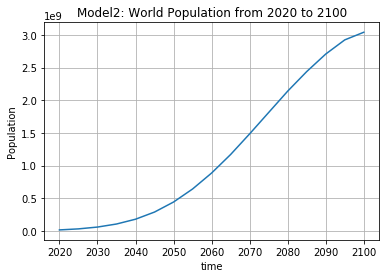

In [10]:
#
# Put your code here
#

Init_Pop = worldpop[0]

time = np.arange(2020,2101,5)
Pop2 = []

for i in range(len(time)):
    Pop2.append(np.interp(time[i],time,Pop))

time = np.arange(2020,2101,5)
plt.plot(time, Pop2)
plt.title("Model2: World Population from 2020 to 2100")
plt.xlabel('time')
plt.ylabel('Population')
plt.grid(True)

In [9]:
print(Pop,Pop2)

[16148876.15, 31974774.777, 59792828.83299, 106431235.3227222, 179868787.6954005, 289588748.1895948, 443070784.73008007, 642452637.8586161, 886584640.2448902, 1170291725.1232553, 1486270490.9065342, 1813249998.9059718, 2139634998.7090466, 2439183898.528313, 2707494127.366428, 2924093657.5557423, 3041057403.857972] [16148876.15, 31974774.777, 59792828.83299, 106431235.3227222, 179868787.6954005, 289588748.1895948, 443070784.73008007, 642452637.8586161, 886584640.2448902, 1170291725.1232553, 1486270490.9065342, 1813249998.9059718, 2139634998.7090466, 2439183898.528313, 2707494127.366428, 2924093657.5557423, 3041057403.857972]


*Comment on results here!*

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 3.2", and push the changes to GitHub.

---

### 3.3 A More Detailed Model (8 points)

It turns out the the world is not just a single value, but in fact a multitude of different nations. The models for different parts of the world are quite different and we should take account of them in our models. 

We provide a new file `regionpop.csv` with the following (similar) format:

* six lines, one from each region. For each line
    * the first field contains the name of the region
    * the second field contains the starting region population value (beginning in the year 2020) in millions. It is an integer
    * the subsequent values are 16 gr values, starting with 2020, and subsequently every 5 years until 2100
        * the *gr* values are floating point values
* all values are comma separated, csv, files. 

Redo the linear interpolation and population prediction done above for each region. Plot all six regions in the same graph. Provide a legend. Do a nice job of creating the plot (size, labels, etc.).

**Note**: All plots should be saved as PNG files and include appropriate axis labels!

For this part of the assignment, you're going to write your code as a script that you will call `run_model.py`. **You'll need to create this script, add it to your repository, and commit it to make sure it gets pushed to GitHub along with your notebook.**

Your instructor should be able to simply run the following on the command line to execute your code:

`$python run_model.py`

---
### STOP
Once your script is done, add and commit the script to your Git repository using the commit message "Adding script for Part 3.3", and push the changes to GitHub.

---

**Question**: Does your more sophisticated model agree with the results for your simpler model? What are the major differences between the two models? Respond in the cell below.

*Put you answer here*

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/RiqmrLMa9m4fu3ZN6" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #1, and upload it there.

&#169; Copyright 2018,  Michigan State University Board of Trustees